In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import random
import copy

import sys
sys.path.append("Fall 2024")

import kmax as kx
import utility as util
from hierarchy import *
import z_solver as zs

# Midterm Presentation

## MVDP with edge weights

In [42]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

def custom_draw(graph, draw_edge_weights=True, draw_path=True):
    layout = hierarchye_pos(graph, 0)
    nx.draw_networkx(graph, pos=layout, with_labels=True,
                     arrows=True, node_size=100)
    if graph.number_of_nodes() <= 1:
        return
    
    if draw_edge_weights:
        pos_weights = nudge(layout, 0.051, 0)
        labels = nx.get_edge_attributes(graph, 'weight')
        text_labels = {e:'%.2f'%(w) for e,w in labels.items()}
        nx.draw_networkx_edge_labels(graph, pos_weights, edge_labels=text_labels,
                                     rotate=False, font_size=10)

    if draw_path:
        path_cover,_,X,_,_=util.path_cover(graph, root=0, return_tuples=False)
        nx.draw_networkx_edges(graph, pos=layout, edgelist=path_cover,
                               edge_color="tab:red", arrows=True, width=3)
        
        other_edges = [(u,v) for u,v in graph.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(graph, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(graph, pos=layout)

In [10]:
lam = 1.1
offspring_dist = lambda: np.random.poisson(lam)
edge_dist = lambda: np.random.uniform(0,1)

In [35]:
tree = nx.Graph(GWBP(dist=offspring_dist, MAXLEVEL=10))
for u,v in tree.edges():
    tree[u][v]['weight'] = edge_dist()

In [36]:
tree.number_of_nodes()

16

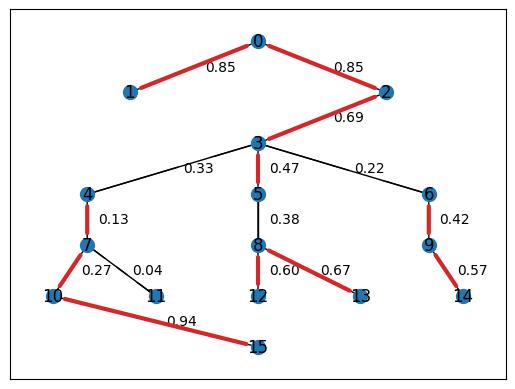

In [43]:
custom_draw(tree)